# Document Scanner

This Notebebook goes thorugh the necessary steps one needs to follow to implement a document scanner utilizing the canny edge detector.
The Goals of this tasl is to implement a three step algorithm:
* Calculate the four corner points of the document.
* Use perspective transformation to get a clean top-view of the document.
* Filter the scanned document to get a clear binary image.


The **Canny edge detector** used in this implementation follows 4 simple steps:
1. Noise reduction
2. Gradient of image
3. Non-maximum suppression
4. Hysteresis


## Imports
This section will contain all imports needed for this project.

In [7]:
from cv2 import imread, cvtColor, GaussianBlur, Canny, findContours,drawContours
from cv2 import contourArea, arcLength, approxPolyDP, threshold, adaptiveThreshold
from cv2 import COLOR_BGR2GRAY, COLOR_BGR2RGB, CHAIN_APPROX_SIMPLE, RETR_LIST, THRESH_BINARY, ADAPTIVE_THRESH_GAUSSIAN_C
from imutils.perspective import four_point_transform
import matplotlib.pyplot as plt
import numpy as np

import cv2


## Load the Image
We load the document froim our images/ directory

(-0.5, 3023.5, 4031.5, -0.5)

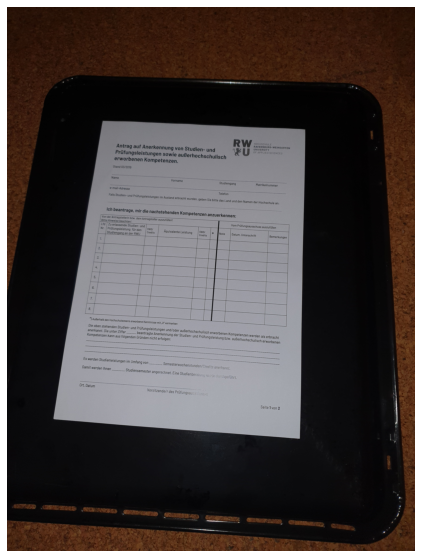

In [8]:
image = imread("/Users/syntax_error/GitHub/rwu_visual_computing/src/images/doc4.jpg")

# Matplotlib needs an RGB image, cv2 provides a BGR image. 
# Thus it has to be converted
image_rgb = cvtColor(image,COLOR_BGR2RGB)

plt.figure(figsize=(10,10))
plt.imshow(image_rgb)
plt.axis('off')


## Image Preprocessing
In order to prepare the image for the edge detection, we first convert the image to a grayscale image.
Then add an gausian blurr, to reduce the noise within the image.

Text(0.5, 1.0, 'Gausian Blurred Image')

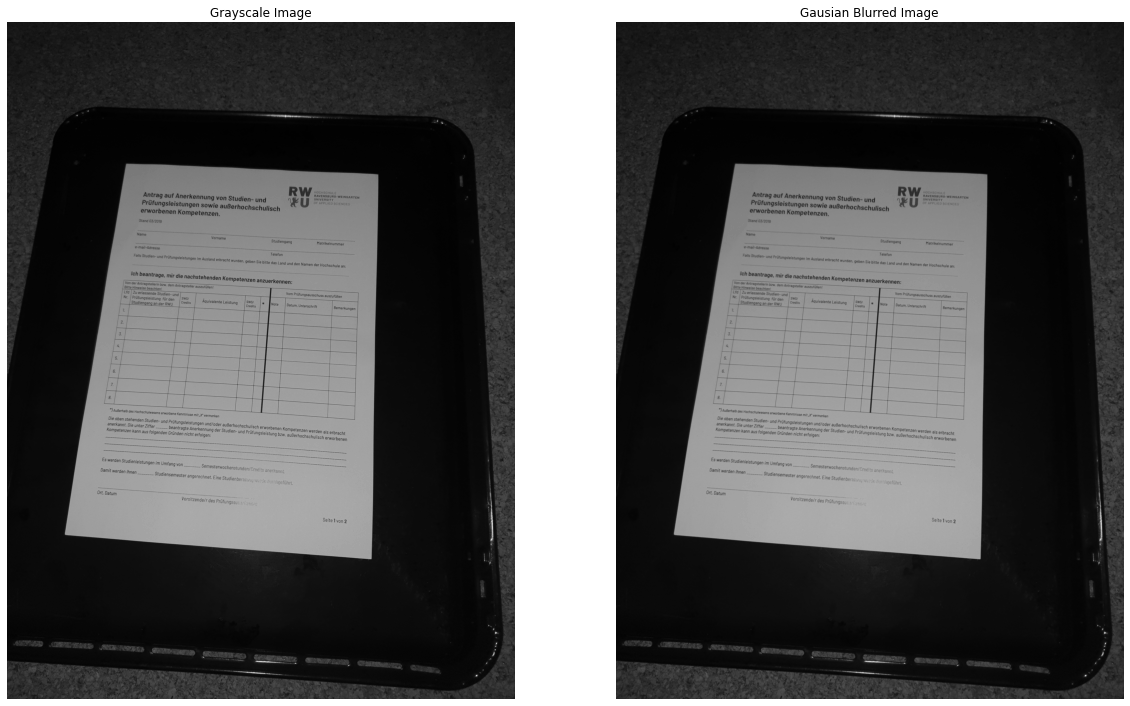

In [9]:
grayscale_image = cvtColor(image,COLOR_BGR2GRAY)
blurred_image = GaussianBlur(grayscale_image, ksize=(5,5),sigmaX=0,sigmaY=0)

f, axs = plt.subplots(1,2,figsize=(20,20))
axs[0].imshow(grayscale_image,cmap="gray")
axs[0].axis("off")
axs[0].set_title("Grayscale Image")


axs[1].imshow(blurred_image,cmap="gray")
axs[1].axis("off")
axs[1].set_title("Gausian Blurred Image")

## Edge Detection
Now we use the Canny edge detection on the blurred image.

(-0.5, 3023.5, 4031.5, -0.5)

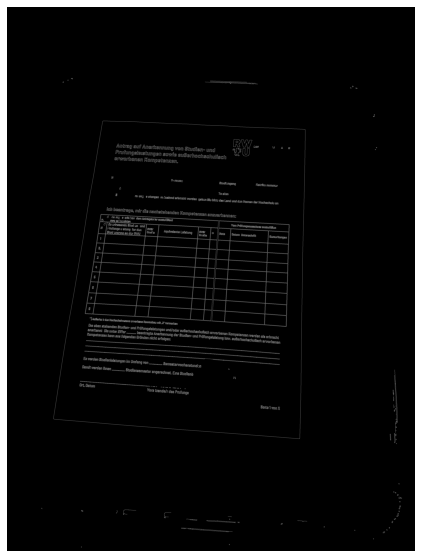

In [10]:
edges = Canny(blurred_image,75,180, L2gradient=True)

plt.figure(figsize=(10,10))
plt.imshow(edges,cmap="gray")
plt.axis('off')


In [11]:
contours, hierarchy = findContours(edges,RETR_LIST, CHAIN_APPROX_SIMPLE)
#contoured_image = drawContours(image, contours, -1, (255,0,0), 5)

#plt.figure(figsize=(20,20))
#plt.imshow(contoured_image)
#plt.axis('off')

(-0.5, 3023.5, 4031.5, -0.5)

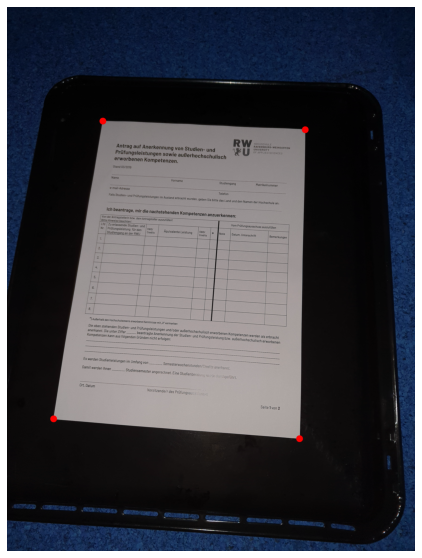

In [12]:
contours = sorted(contours, key=contourArea, reverse=True)
contour = contours[0]

epsilon = 0.1*arcLength(contour,True)
approx = approxPolyDP(contour,epsilon,True)

contoured_image = drawContours(image, approx, -1, (255,0,0), thickness=50)

plt.figure(figsize=(10,10))
plt.imshow(contoured_image)
plt.axis('off')


(-0.5, 1827.5, 2289.5, -0.5)

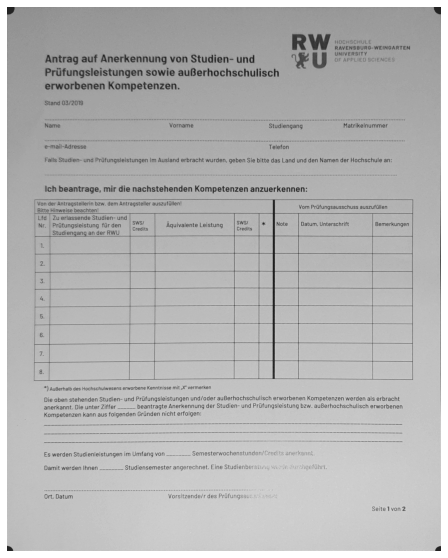

In [13]:
transformation = four_point_transform(image, approx.reshape(4, 2))
transformation = cvtColor(transformation, COLOR_BGR2GRAY)

plt.figure(figsize=(10,10))
plt.imshow(transformation,cmap="gray")
plt.axis('off')

Text(0.5, 1.0, 'Threshold Binary Image')

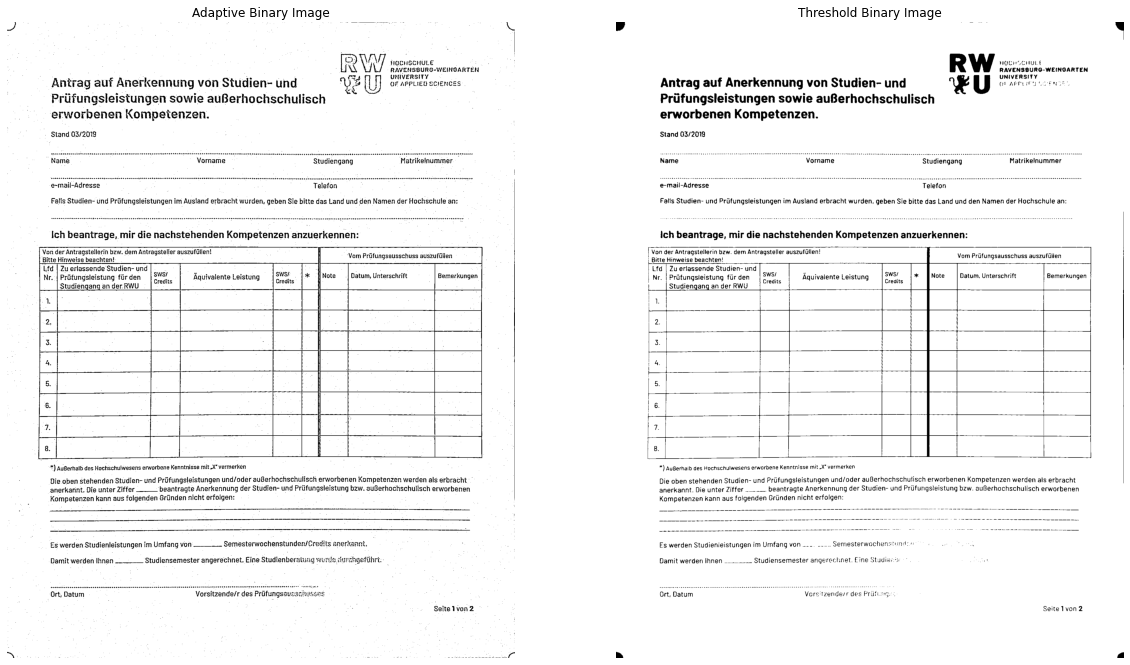

In [14]:
adaptive_binary_image = adaptiveThreshold(transformation,255,ADAPTIVE_THRESH_GAUSSIAN_C, THRESH_BINARY,11,6)
tresh, binary_image = threshold(transformation, 100,255,THRESH_BINARY)

f, axs = plt.subplots(1,2,figsize=(20,20))
axs[0].imshow(adaptive_binary_image,cmap="gray")
axs[0].axis("off")
axs[0].set_title("Adaptive Binary Image")


axs[1].imshow(binary_image,cmap="gray")
axs[1].axis("off")
axs[1].set_title("Threshold Binary Image")